In [31]:
import pandas as pd
import os
import csv
import spacy

In [8]:
def leitor_txt(path):
    df_txt = pd.DataFrame(columns = ['text', 'qualidade'])
    for dir,subdir,files in os.walk(path):
        for dir in subdir:
            print(dir)
            pasta = dir
            for dir,subdir,files in os.walk(path+'/'+ str(dir)):
                for file in files:
                    #print(" ")
                    #print(pasta)
                    #print(file)
                    txt = open(dir + "/" + str(file), 'r', encoding='utf-8')
                    #print(str(csv.reader(txt)))
                    x = txt.readlines()
                    txt.close()
                    #print(x)
                    df_txt = df_txt.append({'text' : str.lower(str(x)) , 'qualidade' : str.lower(pasta)} , ignore_index=True)
    
    print("done")
    return df_txt

In [14]:
path = "C:/Users/vbrandao/Downloads/7IA/7IA"
all_df = leitor_txt(path)
good_df = all_df.loc[all_df['qualidade'] == 'melhores'].iloc[:,0]
good_df.head()

MELHORES
PIORES
done


0    ['você acredita que a rede sociais digitais aj...
1    ['acredito que clientes as redes sociais contr...
2    ['se elas ajudam órgão aumentadas posições ext...
3    ['eu acredito que sim porque hoje em dia as re...
4    ['eu acredito que as redes sociais digitais aj...
Name: text, dtype: object

In [47]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

nlp = spacy.load('pt_core_news_sm')
stopwords = nlp.Defaults.stop_words
stopwords.update("a", "você", "e", "n")

wn = nltk.WordNetLemmatizer()

In [48]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return text

In [49]:
tokenized = good_df.apply(lambda x: clean_text(x))
tokenized

0     [acredita, rede, sociais, digitais, ajudam, au...
1     [acredito, clientes, redes, sociais, contribue...
2     [ajudam, órgão, aumentadas, posições, extremis...
3     [acredito, hoje, dia, redes, sociais, vista, t...
4     [acredito, redes, sociais, digitais, ajudam, p...
5     [acredito, redes, sociais, digitais, ajudam, p...
6     [prática, comum, redes, sociais, digitais, cri...
7     [prática, comum, redes, sociais, digitais, cri...
8     [acho, sessões, aumento, ocorre, há, tenham, f...
9     [acho, sessões, aumento, ocorre, há, tenham, f...
10    [acredito, ajuda, aumentar, posições, extremis...
11    [acredito, pessoas, extremamente, influenciáve...
12    [acredito, associadas, imenso, regime, compact...
13    [ema, numérica, ano, acredito, redes, sociais,...
14    [mostras, cem, clientes, redes, sociais, digit...
15    [mostras, m, redes, sociais, digitais, ajudam,...
16    [olha, acho, determinados, feita, né, pessoas,...
17    [congresso, estados, unidos, polo, josefin

In [50]:
from collections import Counter
s = pd.Series(Counter([y for x in tokenized for y in x]))
s2 = s.sort_values(ascending = False)
s2[0:15]

pessoas        52
sociais        45
redes          36
acredito       28
opinião        26
extremistas    24
opiniões       24
pessoa         20
gente          19
informação     15
posições       14
digitais       13
seja           13
acho           13
acaba          12
dtype: int64

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(2,2))
vect.fit(good_df)
count_vect = vect.transform(good_df)

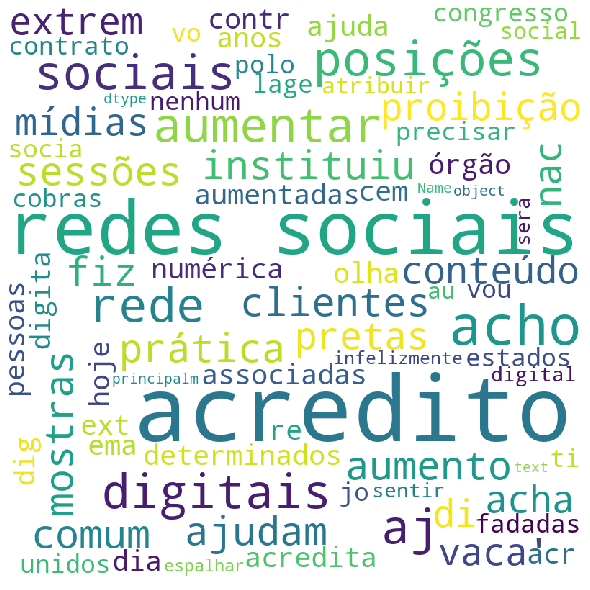

In [65]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

wordcloud = WordCloud(width = 800, height = 800,stopwords=stopwords,
                background_color ='white', 
                min_font_size = 10).generate(str(good_df)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
